<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/CNN_en_Python_Keras_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementación de una CNN en Python**

Este código utiliza la base de datos MNIST para clasificación de dígitos escritos a mano como ejemplo.

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential



## **Modelos Secuenciales de Keras:**

Un modelo secuencial de Keras es una forma sencilla y eficaz de crear redes neuronales artificiales (RNA) en Keras, una biblioteca de aprendizaje automático de alto nivel construida sobre TensorFlow. Se utiliza para apilar capas de neuronas una tras otra en una secuencia lineal, lo que permite que la salida de una capa se convierta en la entrada de la siguiente.

**Ventajas de los modelos secuenciales:**

*  **Facilidad de uso:** Son ideales para arquitecturas de red sencillas en las que las capas se conectan en un único flujo de datos hacia adelante.
*  **Claridad:** La estructura lineal facilita la visualización y comprensión del modelo.
*  **Adecuados para principiantes:** Son un excelente punto de partida para aprender los fundamentos de las redes neuronales.


### **Caracteristicas**
-  **Uso de capas convolucionales (Conv2D):** Las capas Conv2D se utilizan para realizar operaciones de convolución en las imágenes de entrada. La convolución es una operación fundamental en las CNN, que permite extraer características importantes de las imágenes.
- **Uso de capas de agrupación (MaxPooling2D):** Las capas de agrupación (o pooling) se utilizan para reducir la dimensionalidad de las características y hacer que la red sea más eficiente computacionalmente. En este código, se utilizan capas de agrupación máxima (MaxPooling2D).
- **Apilamiento de capas convolucionales y de agrupación:** Las capas convolucionales y de agrupación se apilan una encima de la otra para formar la arquitectura de la red. Esto es característico de las CNN, donde las capas convolucionales extraen características y las capas de agrupación reducen la dimensionalidad.
- **Preprocesamiento específico de imágenes:** Las imágenes de entrada se preprocesan antes de alimentarlas a la red. En este caso, se redimensionan y normalizan para que tengan un rango de valores entre 0 y 1.




# **Librerias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


# **Cargar y preprocesar los datos**

X_train.reshape`((-1, 28, 28, 1))`. Esto cambia la forma de los datos de entrenamiento (X_train). Originalmente, los datos de entrenamiento tienen la forma **`(n_samples, width, height)`**, donde n_samples es el número de imágenes, width es el ancho de la imagen y height es la altura de la imagen. La función reshape se utiliza para cambiar esta forma a (`**n_samples, width, height, channels),**` donde channels es el número de canales de la imagen. En este caso, se cambia a `**(n_samples, 28, 28, 1)**`, lo que indica que cada imagen tiene una altura y anchura de 28 píxeles y un solo canal de color (escala de grises). El valor `**-1**` en la primera dimensión significa que se infiere automáticamente el tamaño de esa dimensión para que se ajuste al número total de muestras.
`.astype('float32')` Esto convierte los datos a tipo de datos de punto flotante de 32 bits. Esto es necesario porque Keras y TensorFlow, que son las bibliotecas subyacentes en este caso, esperan que los datos de entrada sean de tipo float32.
/ 255.0. Esto normaliza los valores de píxeles de las imágenes dividiendo todos los valores por 255. Esto asegura que los valores de píxeles estén en el rango de 0 a 1, lo que puede ayudar a mejorar la convergencia del modelo durante el entrenamiento y facilitar el cálculo de gradientes estables.

In [2]:
# Cargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 1s 0us/step


# **Definir la arquitectura del modelo CNN**

In [3]:
# Definir la arquitectura del modelo CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# **Compilar el modelo**

In [4]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Entrenar el modelo**

In [5]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 54s 66ms/step - loss: 0.2115 - accuracy: 0.9357 - val_loss: 0.0658 - val_accuracy: 0.9811
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0556 - val_accuracy: 0.9851
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0384 - accuracy: 0.9873 - val_loss: 0.0374 - val_accuracy: 0.9893
Epoch 4/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0418 - val_accuracy: 0.9880


# **Evaluar el modelo en el conjunto de prueba**

In [6]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0328 - accuracy: 0.9895


# **Imprimir la precisión en el conjunto de prueba**

In [7]:
# Imprimir la precisión en el conjunto de prueba
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9894999861717224


# **Obtener las métricas de desempeño**

In [8]:
# Obtener las métricas de desempeño
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# **Graficar las métricas de pérdida**

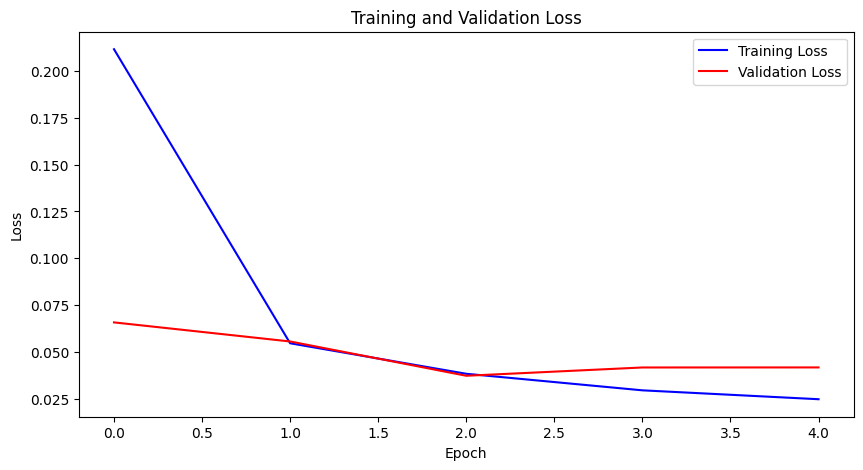

In [9]:
# Graficar las métricas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# **Graficar las métricas de precisión**

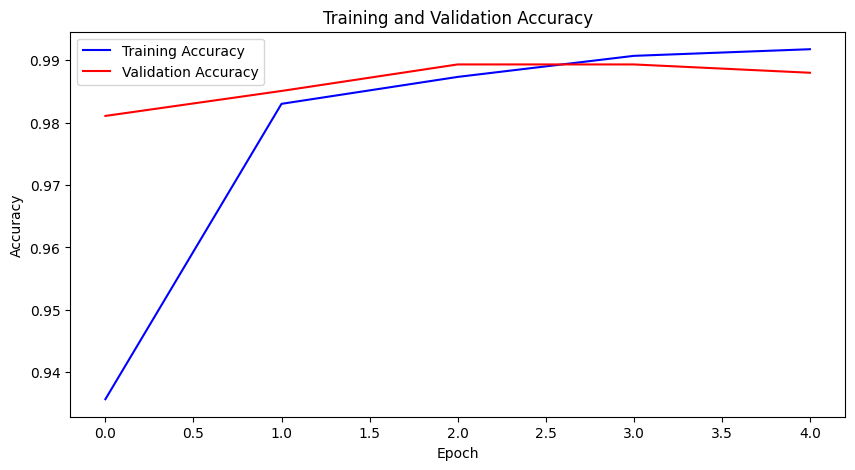

In [10]:
# Graficar las métricas de precisión
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
